# RFM Analysis

### Data Cleaning

In [1]:
# Importing Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [2]:
# Read in the dataset
df = pd.read_csv(R"C:\Users\Admin\Desktop\DataScience 10alytics\Machine Learning\rfm_based_customer_segmentation\Data\bank_data_C.csv")
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


<Axes: >

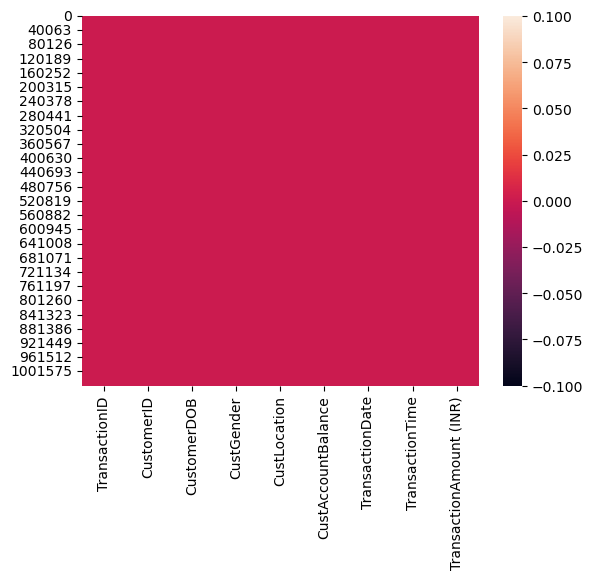

In [4]:
# Visualizing missing data to reconfirm my earlier position of no missing data
sns.heatmap(df.isnull())

In [5]:
# Confirming if there are duplicates
df.duplicated().sum()

0

In [6]:
# Converting the date columns to date-time formats

df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])

df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_77708\3651857122.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_77708\3651857122.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors='coerce')


In [7]:
df["CustomerDOB"].unique()

<DatetimeArray>
['1994-10-01 00:00:00', '2057-04-04 00:00:00', '1996-11-26 00:00:00',
 '2073-09-14 00:00:00', '1988-03-24 00:00:00', '2072-08-10 00:00:00',
 '1992-01-26 00:00:00', '1982-01-27 00:00:00', '1988-04-19 00:00:00',
 '1984-06-22 00:00:00',
 ...
 '2057-10-13 00:00:00', '2044-07-30 00:00:00', '2005-08-15 00:00:00',
 '2046-06-04 00:00:00', '2050-07-01 00:00:00', '2015-11-18 00:00:00',
 '2045-06-28 00:00:00', '2065-07-18 00:00:00', '2042-05-15 00:00:00',
 '2044-10-24 00:00:00']
Length: 17233, dtype: datetime64[ns]

In [8]:
# Cleaning the DOB column by locating the columns with wrong DOBs and substracting 100years from it.

df.loc[df["CustomerDOB"].dt.year > 1999, "CustomerDOB"] = df["CustomerDOB"] - pd.DateOffset(years=100)

df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


<Axes: >

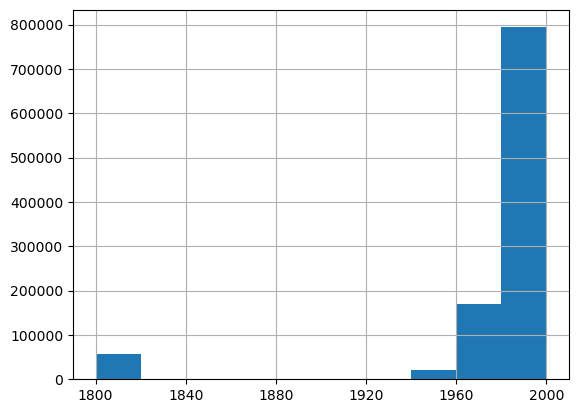

In [9]:
# Reviewing the DOB distribution

df["CustomerDOB"].hist()

In [10]:
df.loc[df["CustomerDOB"].dt.year < 1900, "CustomerDOB"]

16        1800-01-01
22        1800-01-01
28        1800-01-01
34        1800-01-01
150       1800-01-01
             ...    
1041491   1800-01-01
1041500   1800-01-01
1041578   1800-01-01
1041580   1800-01-01
1041587   1800-01-01
Name: CustomerDOB, Length: 56292, dtype: datetime64[ns]

In [11]:
# Calculating the mean of DOB excluding 1800

df.loc[df["CustomerDOB"].dt.year > 1800, "CustomerDOB"].mean()

Timestamp('1985-05-16 00:02:25.560537728')

In [12]:
# Replacing the outliers in date with the mean of the dates

# Defining the replacement timestamp
replacement_date = pd.Timestamp('1985-05-16 00:02:25.560537728')


# Replace dates in CustomerDOB with year 1800
df.loc[df["CustomerDOB"].dt.year == 1800, "CustomerDOB"] = replacement_date


<Axes: >

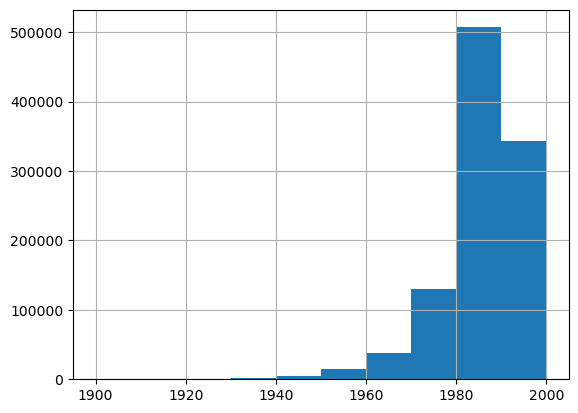

In [13]:
# Reconfirming the DOB distribution

df["CustomerDOB"].hist()

In [14]:
df["CustGender"].value_counts()

CustGender
M    760978
F    280635
T         1
Name: count, dtype: int64

In [15]:
df["CustGender"] = df["CustGender"].replace('T', 'M')

In [16]:
df["CustGender"].value_counts()

CustGender
M    760979
F    280635
Name: count, dtype: int64

<Axes: >

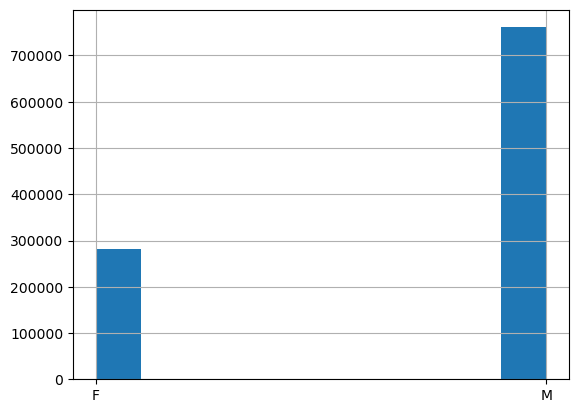

In [17]:
df["CustGender"].hist()

In [18]:
# Identifying the nos of rows where transaction amount is 0

df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

820

In [19]:
# dropping the rows with transaction amount of 0

df.drop(df[df["TransactionAmount (INR)"] == 0].index.tolist(), axis =0, inplace = True)

In [20]:
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

0

In [21]:
## Exploratory Data Analysis

#### Feature Engineering

In [22]:
# creating the age column

df["Age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


In [23]:
df['CustomerID'].nunique()

878763

<Axes: >

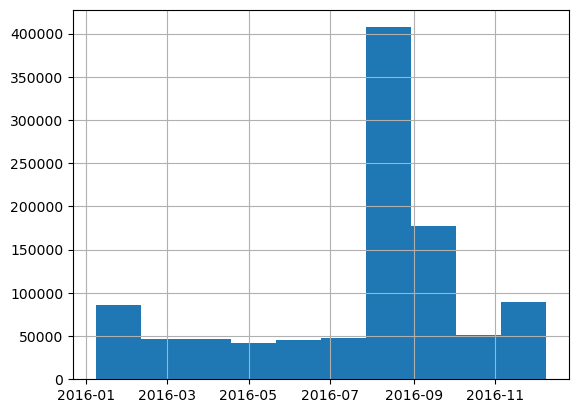

In [24]:
df['TransactionDate'].hist()

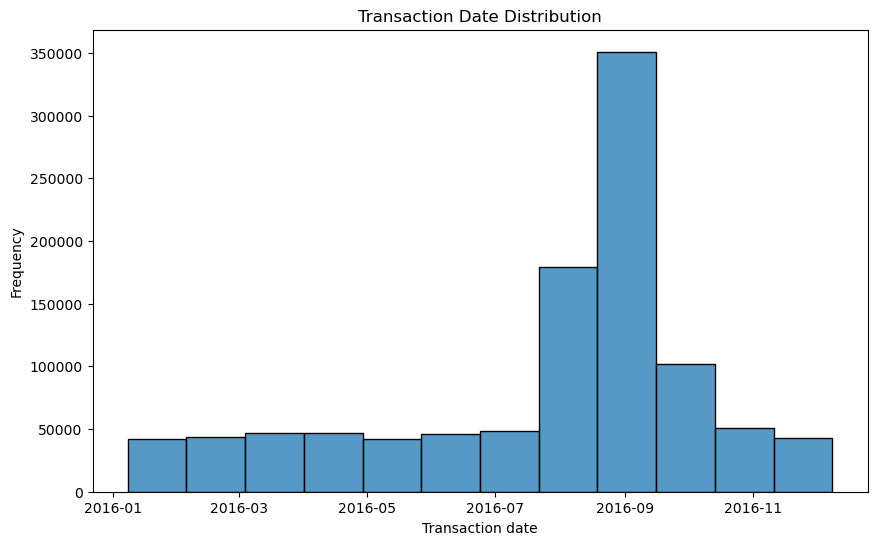

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['TransactionDate'], bins = 12, kde = False)
plt.xlabel('Transaction date')
plt.ylabel('Frequency')
plt.title('Transaction Date Distribution')
plt.show()

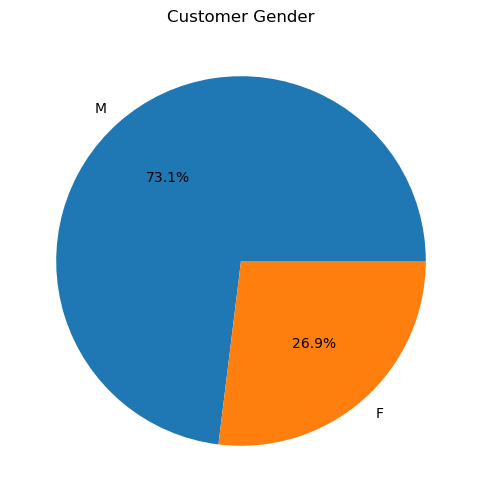

In [26]:
# Reviewing percentage of gender 

plt.figure(figsize=(10,6))
plt.pie(df['CustGender'].value_counts(), labels = df['CustGender'].value_counts().index, autopct = '%1.1f%%')
plt.title('Customer Gender')
plt.show()

In [27]:
df['CustomerID'].value_counts()

top_custlocation = df.groupby('CustLocation')['CustomerID'].nunique().sort_values(ascending= False)
top_custlocation.head(5)

CustLocation
MUMBAI       100123
NEW DELHI     82727
BANGALORE     80053
GURGAON       72566
DELHI         69535
Name: CustomerID, dtype: int64

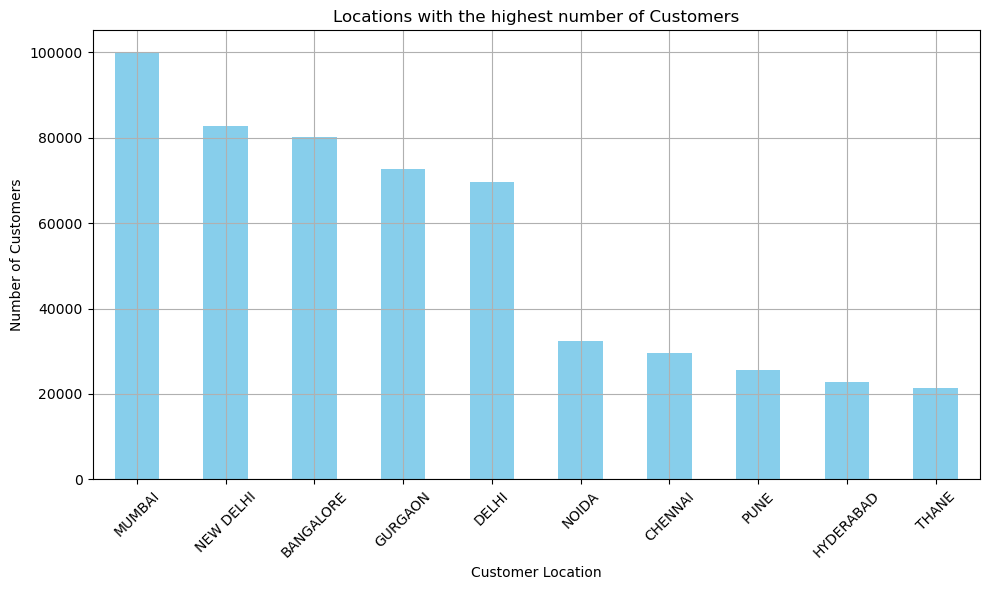

In [28]:
# Locations with the highest number of customers

plt.figure(figsize=(10,6))
top_custlocation.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Customer Location')
plt.ylabel('Number of Customers')
plt.title('Locations with the highest number of Customers')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [29]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28


In [30]:
df['CustomerID'].value_counts()

CustomerID
C1736254    6
C6735477    6
C1026833    6
C7537344    6
C5531319    6
           ..
C3968743    1
C1034011    1
C2240412    1
C4332841    1
C6420483    1
Name: count, Length: 878763, dtype: int64

In [31]:
df['Month'] = df['TransactionDate'].dt.to_period('M')

In [32]:
df['Month']

0          2016-02
1          2016-02
2          2016-02
3          2016-02
4          2016-02
            ...   
1041609    2016-09
1041610    2016-09
1041611    2016-09
1041612    2016-09
1041613    2016-09
Name: Month, Length: 1040794, dtype: period[M]

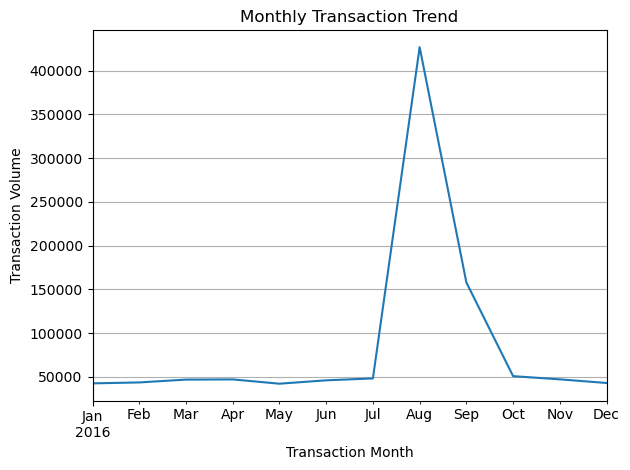

In [33]:
monthly_trend = df.groupby('Month').size()

monthly_trend.plot(kind='line')
plt.xlabel('Transaction Month')
plt.ylabel('Transaction Volume')
plt.title('Monthly Transaction Trend')
#plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
# Save cleaned data
df.to_csv("Cleaned_df.csv", index=False)

## Recency, Frequency and Monetary (RFM) Analysis

#### Recency

In [35]:
day = df['TransactionDate'].max()
day

Timestamp('2016-12-09 00:00:00')

In [36]:

days = df['TransactionDate'].min()
days

Timestamp('2016-01-08 00:00:00')

In [37]:
recency = df.groupby(['CustomerID']).agg({'TransactionDate': lambda x: ((day - x.max()).days) +1})
recency.head()

,TransactionDate
CustomerID,
C1010011,75
C1010012,118
C1010014,155
C1010018,86
C1010024,114


#### Frequency

In [38]:
frequency = df.drop_duplicates(subset = 'TransactionID').groupby(['CustomerID'])[['TransactionID']].count()
frequency.head(5)

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


#### Monetary

In [39]:
monetary = df.groupby('CustomerID')[['TransactionAmount (INR)']].sum()
monetary.head()

,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


#### RFM Table

In [40]:
RFM_table = pd.concat([recency, frequency, monetary], axis = 1)
RFM_table

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,75,2,5106.0
C1010012,118,1,1499.0
C1010014,155,2,1455.0
C1010018,86,1,30.0
C1010024,114,1,5000.0
...,...,...,...
C9099836,155,1,691.0
C9099877,86,1,222.0
C9099919,114,1,126.0


In [41]:
RFM_table = RFM_table.rename(columns = {'TransactionDate': 'recency', 'TransactionID': 'frequency', 'TransactionAmount (INR)': 'monetary'})

RFM_table.head()

,recency,frequency,monetary
CustomerID,,,
C1010011,75,2,5106.0
C1010012,118,1,1499.0
C1010014,155,2,1455.0
C1010018,86,1,30.0
C1010024,114,1,5000.0


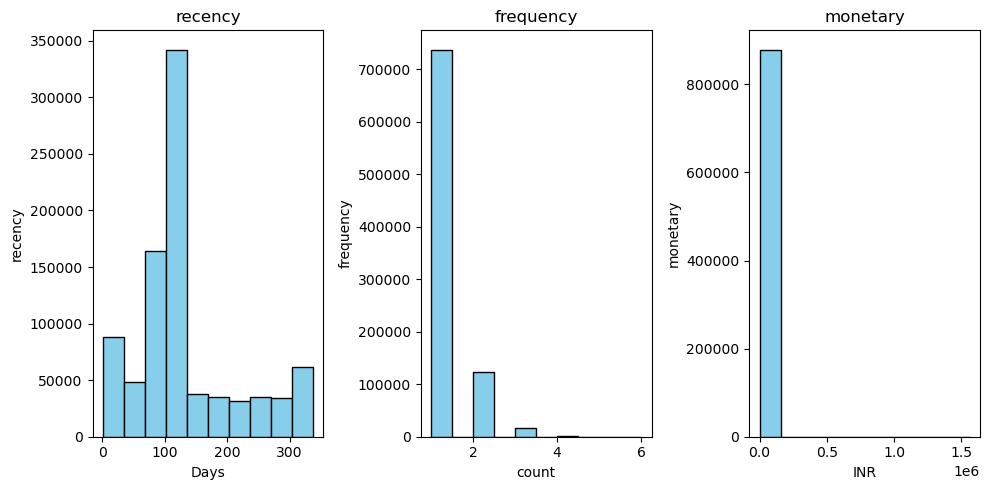

In [42]:
fig, axes = plt.subplots(1,3, figsize= (10,5))

columns = ["recency", 'frequency', 'monetary']

for i, col in enumerate (columns):
    axes[i].hist(RFM_table[col], bins = 10, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Days' if col == 'recency' else 'count' if col == 'frequency' else 'INR')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

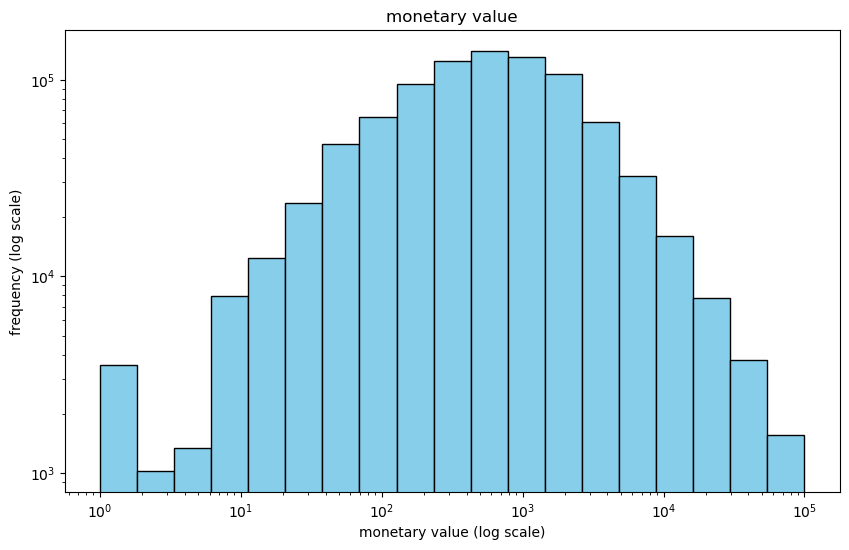

In [43]:
plt.figure(figsize=(10,6))
plt.hist(RFM_table['monetary'], bins = np.logspace(0,5,20), color='skyblue', edgecolor='black')
plt.title('monetary value')
plt.xlabel('monetary value (log scale)')
plt.ylabel('frequency (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [44]:
RFM_table.corr()

,recency,frequency,monetary
recency,1.000000,-0.207705,-0.018321
frequency,-0.207705,1.000000,0.097491
monetary,-0.018321,0.097491,1.000000


#### RFM Score 

In [45]:
# Assign rfm quantile

quantile = RFM_table[['recency', 'frequency', 'monetary']].quantile(q = [0.25, 0.5, 0.75]).to_dict()
quantile

{'recency': {0.25: 87.0, 0.5: 110.0, 0.75: 154.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [46]:
RFM_table['frequency'].value_counts()

frequency
1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: count, dtype: int64

In [47]:
def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.5]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 2
    else:
        return 1

def assign_M_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.5]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 4

In [48]:
def cust_frequeny_score(x):
    if x <= 3:
        return x
    else:
        return 4

In [49]:
RFM_table['R_score'] = RFM_table['recency'].apply(lambda x: assign_R_score(x, 'recency'))

RFM_table['M_score'] = RFM_table['monetary'].apply(lambda x: assign_M_score(x, 'monetary'))

RFM_table['F_score'] = RFM_table['frequency'].apply(cust_frequeny_score)

In [50]:
RFM_table

,recency,frequency,monetary,R_score,M_score,F_score
CustomerID,,,,,,
C1010011,75,2,5106.0,4,4,2
C1010012,118,1,1499.0,2,3,1
C1010014,155,2,1455.0,1,3,2
C1010018,86,1,30.0,4,1,1
C1010024,114,1,5000.0,2,4,1
...,...,...,...,...,...,...
C9099836,155,1,691.0,1,3,1
C9099877,86,1,222.0,4,2,1
C9099919,114,1,126.0,2,1,1


In [51]:
RFM_table['Total_RFM_score'] = RFM_table[['R_score', 'M_score', 'F_score']].sum(axis=1)
RFM_table.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score
CustomerID,,,,,,,
C1010011,75,2,5106.0,4,4,2,10
C1010012,118,1,1499.0,2,3,1,6
C1010014,155,2,1455.0,1,3,2,6
C1010018,86,1,30.0,4,1,1,6
C1010024,114,1,5000.0,2,4,1,7


In [52]:
RFM_table['RFM_group'] = RFM_table['R_score'].astype(str) + RFM_table['M_score'].astype(str) + RFM_table['F_score'].astype(str)
RFM_table.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,RFM_group
CustomerID,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,442
C1010012,118,1,1499.0,2,3,1,6,231
C1010014,155,2,1455.0,1,3,2,6,132
C1010018,86,1,30.0,4,1,1,6,411
C1010024,114,1,5000.0,2,4,1,7,241


<Axes: xlabel='Total_RFM_score', ylabel='count'>

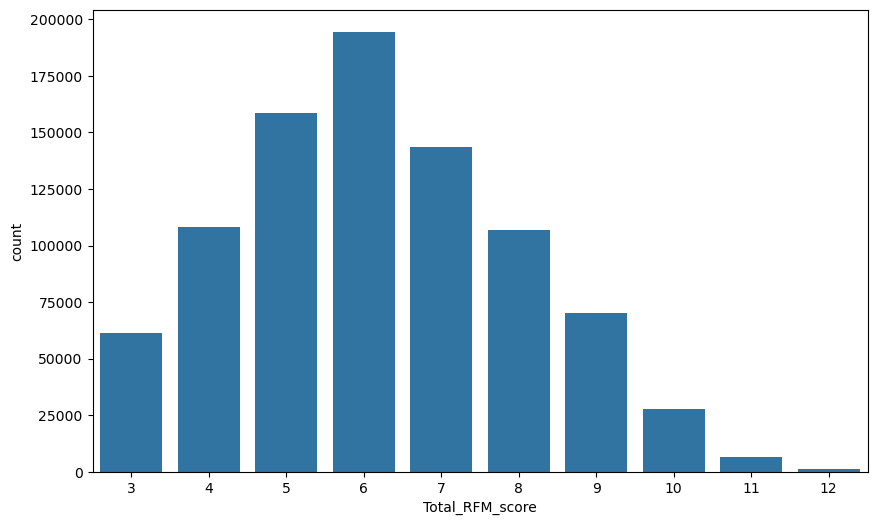

In [53]:
# Visualize the RFM score

plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['Total_RFM_score'])

**12-10** for high valued customers, **9-6** for medium valued customers, **5-3** for low valued customers

In [54]:
def assign_segments(x):
    if x <= 5:
        return 'low valued customers'
    elif x <= 9: 
        return 'medium valued customers'
    else:
        return 'high valued customers'

RFM_table['segments'] = RFM_table['Total_RFM_score'].apply(lambda x: assign_segments(x))
RFM_table.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,RFM_group,segments
CustomerID,,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,442,high valued customers
C1010012,118,1,1499.0,2,3,1,6,231,medium valued customers
C1010014,155,2,1455.0,1,3,2,6,132,medium valued customers
C1010018,86,1,30.0,4,1,1,6,411,medium valued customers
C1010024,114,1,5000.0,2,4,1,7,241,medium valued customers


In [55]:
RFM_table['segments'] = RFM_table['Total_RFM_score'].apply(lambda x: assign_segments(x))
RFM_table.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,RFM_group,segments
CustomerID,,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,442,high valued customers
C1010012,118,1,1499.0,2,3,1,6,231,medium valued customers
C1010014,155,2,1455.0,1,3,2,6,132,medium valued customers
C1010018,86,1,30.0,4,1,1,6,411,medium valued customers
C1010024,114,1,5000.0,2,4,1,7,241,medium valued customers


<Axes: xlabel='segments', ylabel='count'>

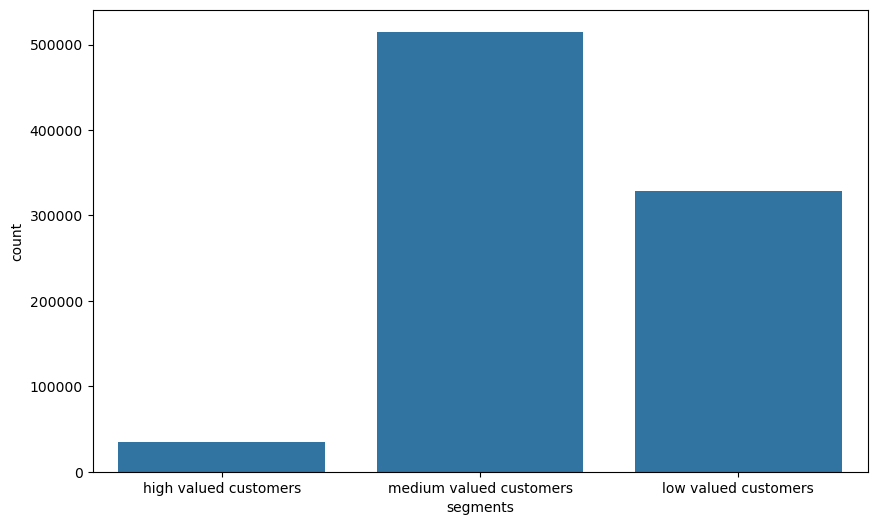

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['segments'])

#### Weighted RFM score

In [57]:
# Prioritizing recency

RFM_table['weighted_score'] = (RFM_table['R_score']*2) + (RFM_table['M_score']* 1) + (RFM_table['F_score']* 1)
RFM_table.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,RFM_group,segments,weighted_score
CustomerID,,,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,442,high valued customers,14
C1010012,118,1,1499.0,2,3,1,6,231,medium valued customers,8
C1010014,155,2,1455.0,1,3,2,6,132,medium valued customers,7
C1010018,86,1,30.0,4,1,1,6,411,medium valued customers,10
C1010024,114,1,5000.0,2,4,1,7,241,medium valued customers,9


<Axes: xlabel='weighted_score', ylabel='count'>

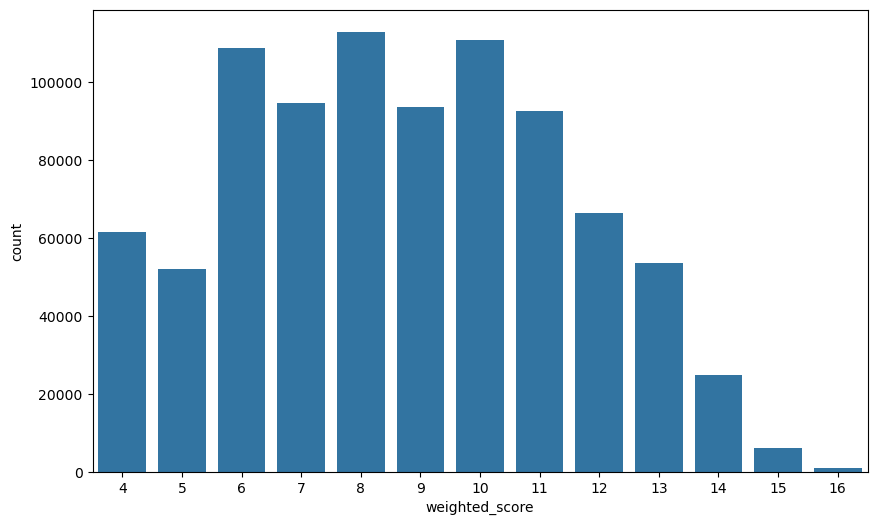

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['weighted_score'])

In [59]:
RFM_table['weighted_segments'] = RFM_table['weighted_score'].apply(lambda x: assign_segments(x))
RFM_table.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,RFM_group,segments,weighted_score,weighted_segments
CustomerID,,,,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,442,high valued customers,14,high valued customers
C1010012,118,1,1499.0,2,3,1,6,231,medium valued customers,8,medium valued customers
C1010014,155,2,1455.0,1,3,2,6,132,medium valued customers,7,medium valued customers
C1010018,86,1,30.0,4,1,1,6,411,medium valued customers,10,high valued customers
C1010024,114,1,5000.0,2,4,1,7,241,medium valued customers,9,medium valued customers


<Axes: xlabel='weighted_segments', ylabel='count'>

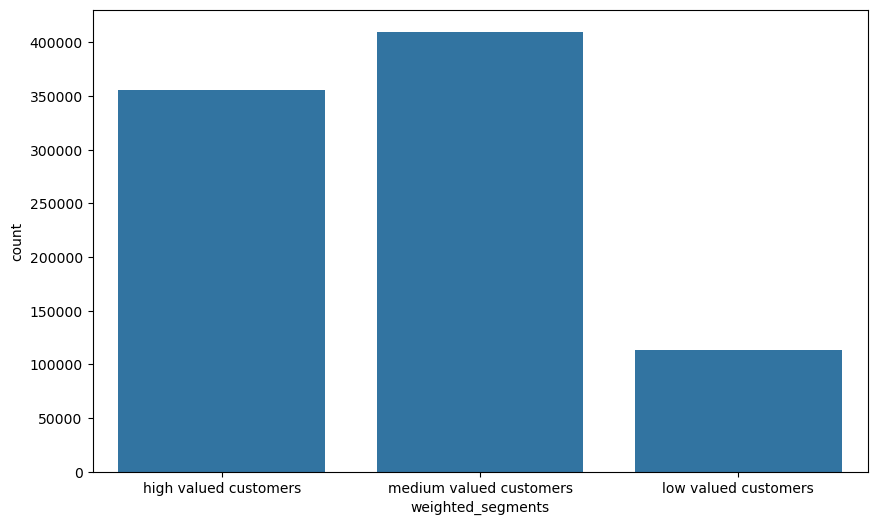

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x=RFM_table['weighted_segments'])

### Customer Segmentation with K-Means

In [61]:
# Importing relevant libraries

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA


**Create dataframe for clustering algorithm**

In [62]:
RFM_df = RFM_table.drop(['RFM_group', 'segments', 'weighted_score',	'weighted_segments'], axis = 1)
RFM_df.head() 

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score
CustomerID,,,,,,,
C1010011,75,2,5106.0,4,4,2,10
C1010012,118,1,1499.0,2,3,1,6
C1010014,155,2,1455.0,1,3,2,6
C1010018,86,1,30.0,4,1,1,6
C1010024,114,1,5000.0,2,4,1,7


In [63]:
# Scaling the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(RFM_df)
scaled_df

array([[-0.68451515,  1.8173276 ,  0.45193522, ...,  1.34172808,
         1.82368347,  2.08038494],
       [-0.14734272, -0.41084172, -0.04969314, ...,  0.45881674,
        -0.41175149, -0.09806538],
       [ 0.31487542,  1.8173276 , -0.05581225, ...,  0.45881674,
         1.82368347, -0.09806538],
       ...,
       [-0.19731225, -0.41084172, -0.24063734, ..., -1.30700594,
        -0.41175149, -1.18729054],
       [-0.32223607, -0.41084172, -0.25120672, ..., -1.30700594,
        -0.41175149, -0.64267796],
       [-0.67202277, -0.41084172, -0.13925473, ...,  0.45881674,
        -0.41175149,  0.99115978]])

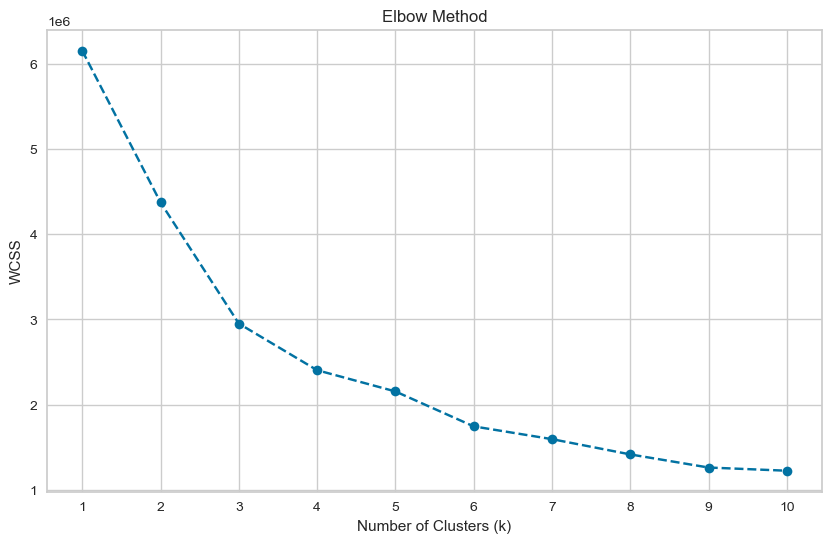

In [64]:
from sklearn.cluster import KMeans

# Apply the Elbow Method to find the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):  # Trying k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

In [65]:
# Implement clustering algorithm 
model = KMeans(random_state = 1)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10))

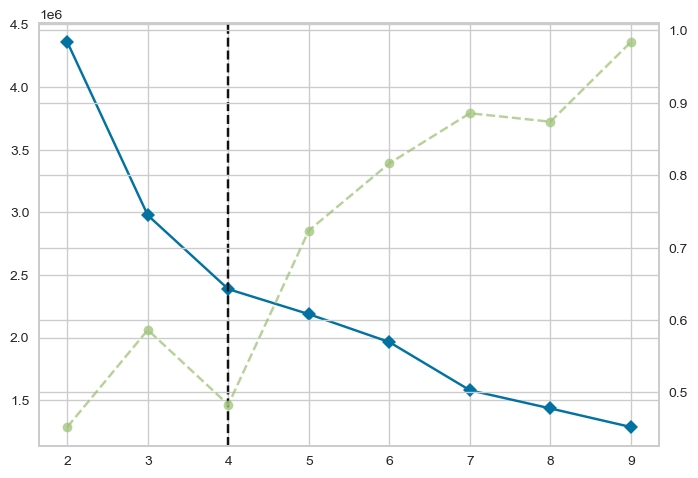

In [66]:
# Using the distortion metric
plot_model = KElbowVisualizer(model, k = (2, 10), metric = 'distortion', timing = False)
plot_model.fit(scaled_df)

**using the calinski- harabasz metric**

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=1),
                 k=(2, 10), metric='calinski_harabasz')

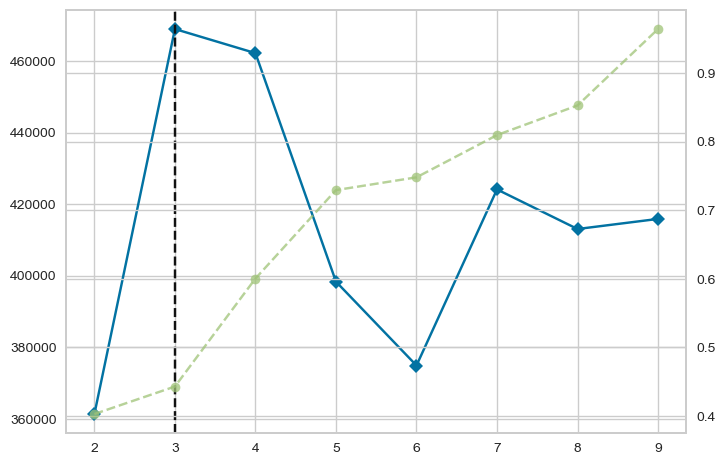

In [67]:
plot_model_2 = KElbowVisualizer(model, k = (2, 10), metric = 'calinski_harabasz', timing = False) # type: ignore
plot_model_2.fit(scaled_df)

### Cluster Assignment

In [68]:
final_model = KMeans(random_state = 1, n_clusters = 4)
final_model.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [69]:
cluster_assignment = final_model.labels_
cluster_assignment

array([1, 3, 1, ..., 2, 2, 3])

In [70]:
RFM_df['Cluster'] = cluster_assignment
RFM_df

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,Cluster
CustomerID,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,1
C1010012,118,1,1499.0,2,3,1,6,3
C1010014,155,2,1455.0,1,3,2,6,1
C1010018,86,1,30.0,4,1,1,6,2
C1010024,114,1,5000.0,2,4,1,7,3
...,...,...,...,...,...,...,...,...
C9099836,155,1,691.0,1,3,1,5,0
C9099877,86,1,222.0,4,2,1,7,2
C9099919,114,1,126.0,2,1,1,4,2


<Axes: xlabel='recency', ylabel='monetary'>

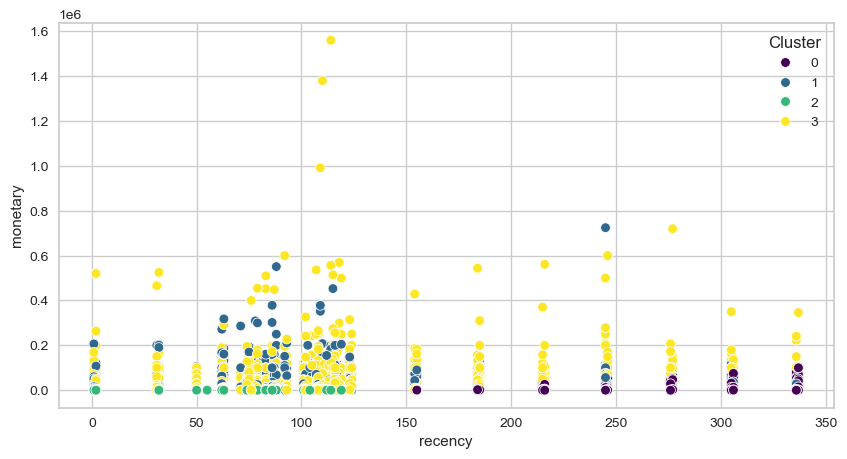

In [71]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=RFM_df, x=RFM_df['recency'], y=RFM_df['monetary'], hue=RFM_df['Cluster'], palette = 'viridis')

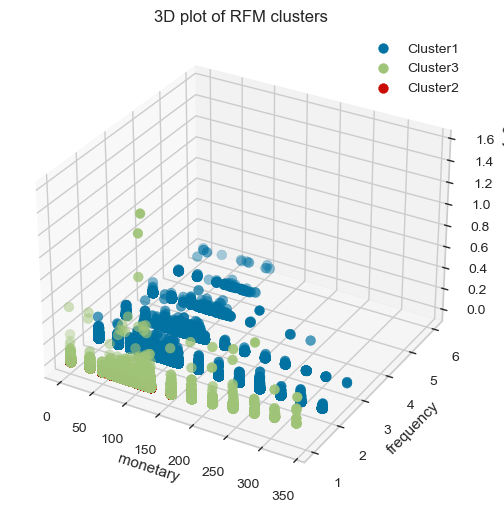

In [72]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection = '3d')

color = ['b', 'g', 'r']
for cluster, color in zip(RFM_df['Cluster'].unique(), color):
    cluster_df = RFM_df[RFM_df['Cluster'] ==cluster]
    ax.scatter(cluster_df['recency'], cluster_df['frequency'], cluster_df['monetary'], c = color, s=50, marker ='o', label =f'Cluster{cluster}')

ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_xlabel('monetary')
ax.legend()
plt.title('3D plot of RFM clusters')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_77708\478519859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = RFM_df['Cluster'], palette = 'viridis')


<Axes: xlabel='Cluster', ylabel='count'>

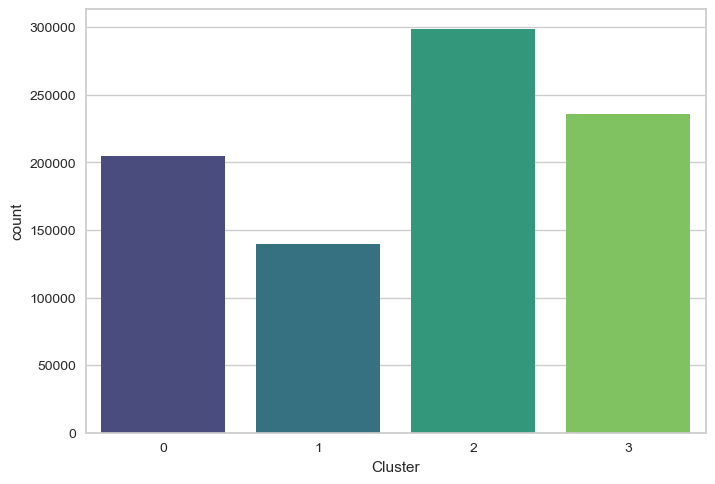

In [73]:
sns.countplot(x = RFM_df['Cluster'], palette = 'viridis')

In [74]:
for cluster in RFM_df['Cluster'].unique():
    print(f"cluster: {cluster}")
    print(RFM_df[RFM_df["Cluster"] == cluster].describe())

cluster: 1
             recency      frequency       monetary        R_score  \
count  139816.000000  139816.000000  139816.000000  139816.000000   
mean       89.082237       2.144883    3389.784695       3.106011   
std        47.158975       0.393544    8890.585311       0.921900   
min         1.000000       2.000000       2.000000       1.000000   
25%        63.000000       2.000000     667.572500       2.000000   
50%        93.000000       2.000000    1447.590000       3.000000   
75%       111.000000       2.000000    3068.000000       4.000000   
max       337.000000       6.000000  724472.000000       4.000000   

             M_score        F_score  Total_RFM_score   Cluster  
count  139816.000000  139816.000000    139816.000000  139816.0  
mean        3.251130       2.143675         8.500815       1.0  
std         0.865427       0.385981         1.372288       0.0  
min         1.000000       2.000000         5.000000       1.0  
25%         3.000000       2.000000       

In [75]:
Cluster_0 = RFM_df[RFM_df['Cluster'] == 0]
Cluster_1 = RFM_df[RFM_df['Cluster'] == 1]
Cluster_2 = RFM_df[RFM_df['Cluster'] == 2]
Cluster_2 = RFM_df[RFM_df['Cluster'] == 3]

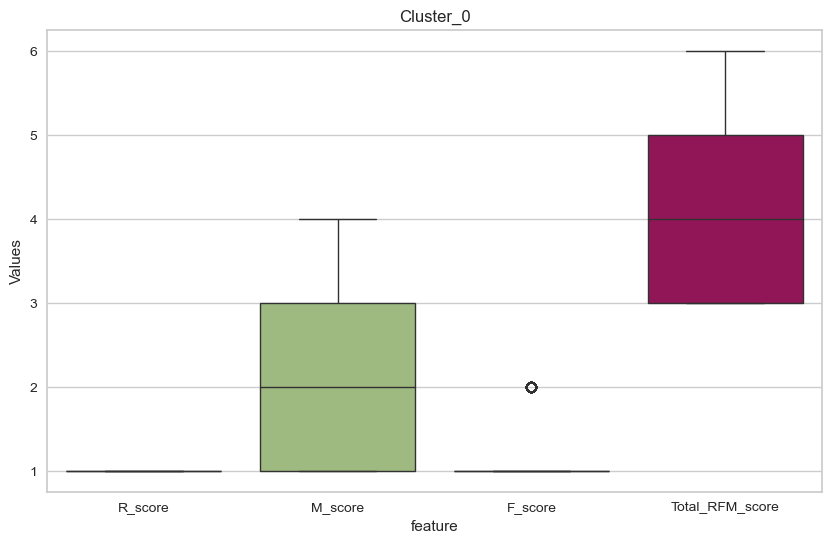

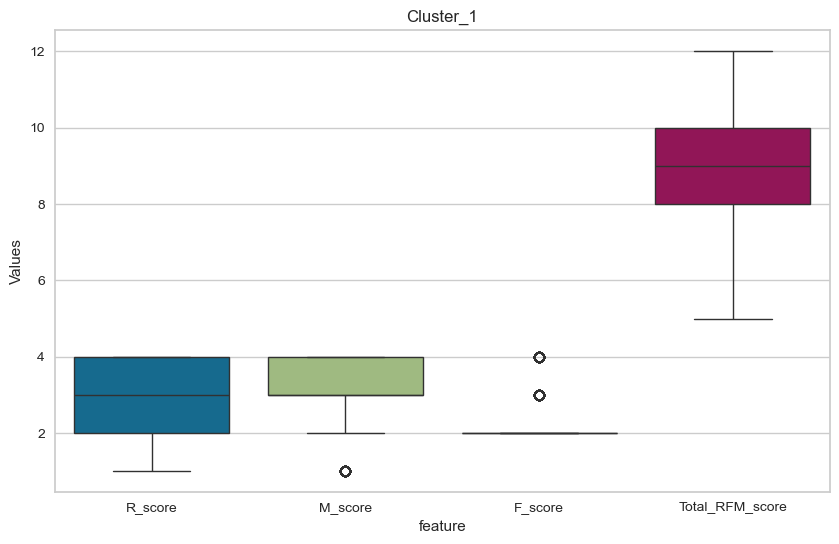

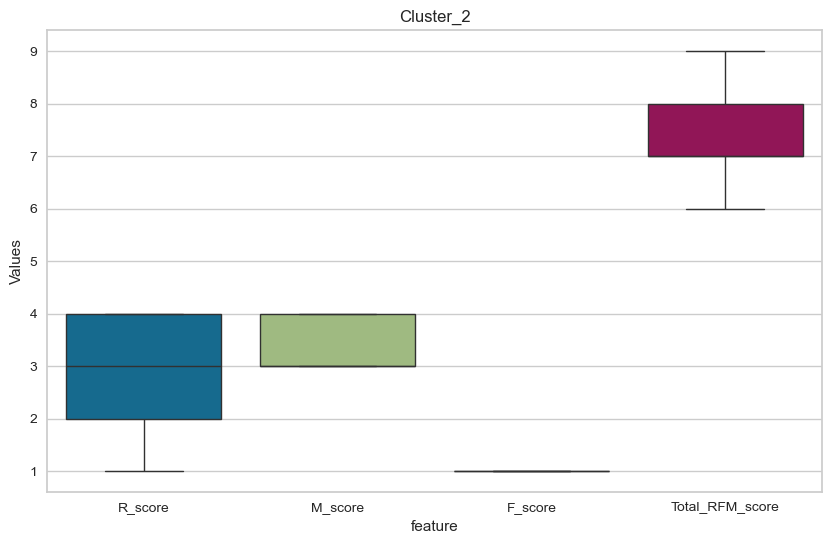

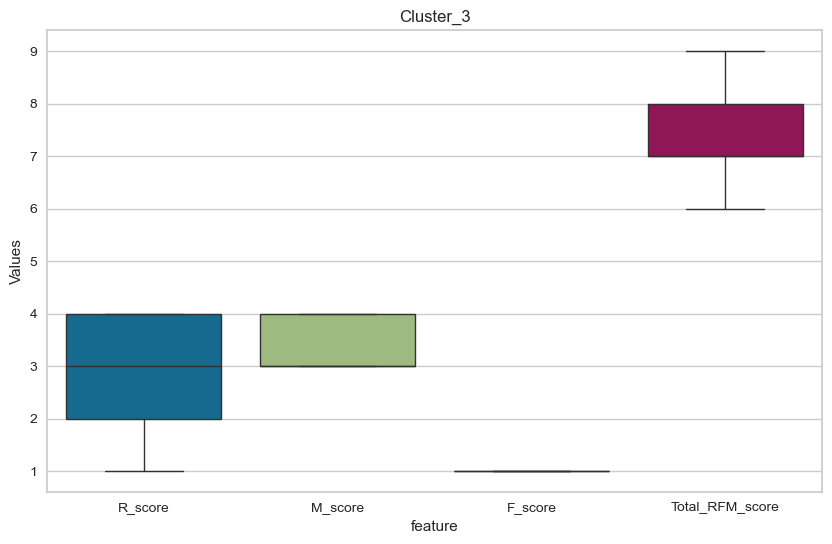

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = Cluster_0[['R_score', 'M_score', 'F_score', 'Total_RFM_score']])
plt.title(f'Cluster_0')
plt.ylabel('Values')
plt.xlabel('feature')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data = Cluster_1[['R_score', 'M_score', 'F_score', 'Total_RFM_score']])
plt.title(f'Cluster_1')
plt.ylabel('Values')
plt.xlabel('feature')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data = Cluster_2[['R_score', 'M_score', 'F_score', 'Total_RFM_score']])
plt.title(f'Cluster_2')
plt.ylabel('Values')
plt.xlabel('feature')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data = Cluster_2[['R_score', 'M_score', 'F_score', 'Total_RFM_score']])
plt.title(f'Cluster_3')
plt.ylabel('Values')
plt.xlabel('feature')
plt.show()

In [77]:
RFM_df.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,Cluster
CustomerID,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,1
C1010012,118,1,1499.0,2,3,1,6,3
C1010014,155,2,1455.0,1,3,2,6,1
C1010018,86,1,30.0,4,1,1,6,2
C1010024,114,1,5000.0,2,4,1,7,3


In [78]:
def assign_segment(score):
    if score >= 9:
        return 'Best Customers'
    elif score >= 6:
        return 'Loyal Customers'
    elif score >= 4:
        return 'At Risk'
    else:
        return 'Churned'

RFM_df['Segment'] = RFM_df['Total_RFM_score'].apply(assign_segment)
RFM_df.head()

,recency,frequency,monetary,R_score,M_score,F_score,Total_RFM_score,Cluster,Segment
CustomerID,,,,,,,,,
C1010011,75,2,5106.0,4,4,2,10,1,Best Customers
C1010012,118,1,1499.0,2,3,1,6,3,Loyal Customers
C1010014,155,2,1455.0,1,3,2,6,1,Loyal Customers
C1010018,86,1,30.0,4,1,1,6,2,Loyal Customers
C1010024,114,1,5000.0,2,4,1,7,3,Loyal Customers


In [79]:
# Save RFM + Clustering results
# RFM_df.to_csv("RFM_Segmented.csv", index=False)

In [80]:
# Saving the RFM result in pickle

#import pickle

#with open('RFM_data.pkl', 'wb') as f:
 #   pickle.dump(RFM_df, f)